<a href="https://colab.research.google.com/github/gimmas/mini-project-teks/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import re
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


To crawl YouTube comments using the YouTube Data API, you'll need to install the Google API client library.

In [3]:
# Install Sastrawi
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.2 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
from googleapiclient.discovery import build
import pandas as pd

In [5]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments.csv'

# Read the CSV file into a pandas DataFrame
try:
    saved_comments_df = pd.read_csv(file_path)
    print(f"Successfully read data from {file_path}")
    display(saved_comments_df)

except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully read data from /content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments.csv


,author,published_at,text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...
...,...,...,...
2162,@Riswanz-l2g,2025-09-26T09:49:59Z,Pertama bang
2163,@Fatqul,2025-09-26T09:49:52Z,Pertama
2164,@AvinZidan,2025-09-26T09:49:49Z,Pertama
2165,@nezzralmuhammadyusuf4757,2025-09-26T09:49:42Z,First


In [6]:
import re

# Function to remove URLs
def remove_urls(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Function to remove HTML tags and web elements
def remove_html_tags(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    html_pattern = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return html_pattern.sub(r'', text)

# Function to remove mentions and hashtags
def remove_mentions_hashtags(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    pattern = re.compile(r'@\w+|\#\w+')
    return pattern.sub(r'', text)

# Function to remove emojis (more comprehensive)
def remove_emojis(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols and Pictographs
        "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002500-\U00002B50"  # Box Drawing and Miscellaneous Symbols
        "\U00002700-\U000027BF"  # Dingbats
        "\U0000FE00-\U0000FE0F"  # Variation Selectors
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U0000200D" # Zero Width Joiner
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Function to remove numbers
def remove_numbers(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return text
    return re.sub(r'\d+', '', text)


# Apply the functions to the 'text' column in order
saved_comments_df['clean_text'] = saved_comments_df['text'].apply(remove_urls)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_html_tags)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_mentions_hashtags)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_emojis)
saved_comments_df['clean_text'] = saved_comments_df['clean_text'].apply(remove_numbers)


print("Preprocessing steps applied: Removing URLs, HTML tags, mentions, hashtags, emojis, and numbers.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Removing URLs, HTML tags, mentions, hashtags, emojis, and numbers.


,author,published_at,text,clean_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...
...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b..."


In [7]:
# 1. Case Folding (already done in cell 6_wq8Wqc1q4A, but including for completeness)
saved_comments_df['case_fold_text'] = saved_comments_df['clean_text'].str.lower()
print("Preprocessing steps applied: Case Folding.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding.


,author,published_at,text,clean_text,case_fold_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...
...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun,b for beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b..."


In [8]:
# 2. Removing Punctuation
def remove_punctuation(text):
    # Ensure text is a string before applying lower()
    if not isinstance(text, str):
        return text
    return re.sub(r'[^\w\s]', '', text.lower()) # Apply lower() here for consistency

saved_comments_df['punctuation_text'] = saved_comments_df['case_fold_text'].apply(remove_punctuation)
print("Preprocessing steps applied: Case Folding, Removing Punctuation.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation.


,author,published_at,text,clean_text,case_fold_text,punctuation_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...
...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun,b for beracun,b for beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...


In [9]:
# Define the file paths for the dictionaries
slang_file_path = '/content/drive/MyDrive/Tugas/TEKS/kamus/slang.csv'
non_standard_file_path = '/content/drive/MyDrive/Tugas/TEKS/kamus/kamuskatabaku.xlsx'

# Read the slang CSV file into a pandas DataFrame
try:
    slang_df = pd.read_csv(slang_file_path)
    print(f"Successfully read data from {slang_file_path}")
    display(slang_df.head())
except FileNotFoundError:
    print(f"Error: The file {slang_file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

# Read the non-standard word Excel file into a pandas DataFrame
try:
    non_standard_df = pd.read_excel(non_standard_file_path)
    print(f"\nSuccessfully read data from {non_standard_file_path}")
    display(non_standard_df.head())
except FileNotFoundError:
    print(f"Error: The file {non_standard_file_path} was not found.")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Successfully read data from /content/drive/MyDrive/Tugas/TEKS/kamus/slang.csv


,slang,formal
0,udah,sudah
1,gua,aku
2,ntar,nanti
3,be like,seperti
4,aja,saja



Successfully read data from /content/drive/MyDrive/Tugas/TEKS/kamus/kamuskatabaku.xlsx


,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [10]:
# Create dictionaries for mapping slang and non-standard words
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))
non_standard_dict = dict(zip(non_standard_df['tidak_baku'], non_standard_df['kata_baku']))

# Function to replace words using the dictionaries
def replace_words(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    replaced_words = [slang_dict.get(word, non_standard_dict.get(word, word)) for word in words]
    return ' '.join(replaced_words)

# Apply the replacement function to the 'punctuation_text' column
saved_comments_df['normalized_text'] = saved_comments_df['punctuation_text'].apply(replace_words)

print("Preprocessing steps applied: Case Folding, Removing Punctuation, and Standardizing words.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, and Standardizing words.


,author,published_at,text,clean_text,case_fold_text,punctuation_text,normalized_text
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...
...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...,sudah teman nikmati saja kalau semua orang bai...


In [11]:
# Import the StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk # Import nltk for tokenization

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to perform stemming on a list of tokens
def stem_tokens(tokens):
    # Ensure tokens is a list
    if not isinstance(tokens, list):
        return []
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply tokenization and then stemming to the 'normalized_text' column
# First, tokenize the text
saved_comments_df['tokens'] = saved_comments_df['normalized_text'].apply(nltk.word_tokenize)

# Then, apply stemming to the tokens
saved_comments_df['text_stemmed'] = saved_comments_df['tokens'].apply(stem_tokens)

print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, and Stemming.")
display(saved_comments_df.head(100))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, and Stemming.


,author,published_at,text,clean_text,case_fold_text,punctuation_text,normalized_text,tokens,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setip, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[di, daerah, kalimantan, selatan, tabalong, ay..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, kalau, makan, mbg, itu, ada, racun, at..."
...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, kalau, aku, pikir, makan, racun, gratis,..."
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,"[b, untuk, beracun]","[b, untuk, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[daripada, makan, gratis, mending, uang, ya, s..."
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...,sudah teman nikmati saja kalau semua orang bai...,"[sudah, teman, nikmati, saja, kalau, semua, or...","[sudah, teman, nikmat, saja, kalau, semua, ora..."


In [12]:
# Import the StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk # Import nltk for tokenization

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to perform stemming on a list of tokens
def stem_tokens(tokens):
    # Ensure tokens is a list
    if not isinstance(tokens, list):
        return []
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply tokenization and then stemming to the 'normalized_text' column
# First, tokenize the text
saved_comments_df['tokens'] = saved_comments_df['normalized_text'].apply(nltk.word_tokenize)

# Then, apply stemming to the tokens
saved_comments_df['text_stemmed'] = saved_comments_df['tokens'].apply(stem_tokens)

print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, and Stemming.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, and Stemming.


,author,published_at,text,clean_text,case_fold_text,punctuation_text,normalized_text,tokens,text_stemmed
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,"[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setipis, tisu]","[anjing, semangka, setip, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[di, daerah, kalimantan, selatan, tabalong, ay..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, kalau, makan, mbg, itu, ada, racun, at..."
...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, kalau, aku, pikir, makan, racun, gratis,..."
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,"[b, untuk, beracun]","[b, untuk, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[daripada, makan, gratis, mending, uang, ya, s..."
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...,sudah teman nikmati saja kalau semua orang bai...,"[sudah, teman, nikmati, saja, kalau, semua, or...","[sudah, teman, nikmat, saja, kalau, semua, ora..."


In [13]:
# Get the current column order
current_cols = saved_comments_df.columns.tolist()

# Find the indices of 'tokens' and 'text_stemmed'
try:
    tokens_index = current_cols.index('tokens')
    stemmed_index = current_cols.index('text_stemmed')

    # Swap the column names in the list
    current_cols[tokens_index], current_cols[stemmed_index] = current_cols[stemmed_index], current_cols[tokens_index]

    # Reindex the DataFrame with the new column order
    saved_comments_df = saved_comments_df[current_cols]

    print("Columns reordered: 'tokens' and 'text_stemmed' positions swapped.")
    display(saved_comments_df.head())

except ValueError as e:
    print(f"Error: One of the columns ('tokens' or 'text_stemmed') was not found in the DataFrame. {e}")
except Exception as e:
    print(f"An error occurred while reordering columns: {e}")

Columns reordered: 'tokens' and 'text_stemmed' positions swapped.


,author,published_at,text,clean_text,case_fold_text,punctuation_text,normalized_text,text_stemmed,tokens
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,"[sesal, pilih, prabowo, enak, aniess, didik, g...","[menyesal, pilih, prabowo, enak, aniess, pendi..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setip, tisu]","[anjing, semangka, setipis, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[di, daerah, kalimantan, selatan, tabalong, ay..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makan, mbg, itu, ada, racun, at...","[kakak, kalau, makanan, mbg, itu, ada, racunny..."


In [22]:
import nltk
from nltk.corpus import stopwords

# Download Indonesian stop words (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Get the list of Indonesian stop words and add 'ya' explicitly
stop_words = set(stopwords.words('indonesian'))
stop_words.add('ya') # Explicitly add 'ya' to the stop
stop_words.add('sih') # Explicitly add 'iya' to the stop

# Function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    # Ensure tokens is a list
    if not isinstance(tokens, list):
        return []
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the stop word removal function to the 'text_stemmed' column
saved_comments_df['text_clean'] = saved_comments_df['text_stemmed'].apply(remove_stopwords)

print("Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.")
display(saved_comments_df.head(100))

Preprocessing steps applied: Case Folding, Removing Punctuation, Standardizing words, Tokenization, Stemming, and Stop word removal.


,author,published_at,text,clean_text,case_fold_text,punctuation_text,normalized_text,text_stemmed,tokens,text_clean
0,@camatkaliguwo5666,2025-10-06T16:17:22Z,Kaget kalidawir tulungagung,Kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,kaget kalidawir tulungagung,"[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]","[kaget, kalidawir, tulungagung]"
1,@reyy_afz34,2025-10-06T13:28:37Z,10000000000000% nyesel pilih Prabowo enak anie...,% nyesel pilih Prabowo enak aniess pendidikan ...,% nyesel pilih prabowo enak aniess pendidikan ...,nyesel pilih prabowo enak aniess pendidikan g...,menyesal pilih prabowo enak aniess pendidikan ...,"[sesal, pilih, prabowo, enak, aniess, didik, g...","[menyesal, pilih, prabowo, enak, aniess, pendi...","[sesal, pilih, prabowo, enak, aniess, didik, g..."
2,@Karis-b,2025-10-06T11:32:17Z,Jirr semangka setipis tisu😂,Jirr semangka setipis tisu,jirr semangka setipis tisu,jirr semangka setipis tisu,anjing semangka setipis tisu,"[anjing, semangka, setip, tisu]","[anjing, semangka, setipis, tisu]","[anjing, semangka, setip, tisu]"
3,@habibi3722,2025-10-06T11:03:10Z,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah Kalimantan Selatan Tabalong. ayam ...,di. daerah kalimantan selatan tabalong. ayam ...,di daerah kalimantan selatan tabalong ayam go...,di daerah kalimantan selatan tabalong ayam gor...,"[di, daerah, kalimantan, selatan, tabalong, ay...","[di, daerah, kalimantan, selatan, tabalong, ay...","[daerah, kalimantan, selatan, tabalong, ayam, ..."
4,@shadow_milk_cookie182,2025-10-06T10:34:07Z,Bang kalo makanan MBG itu ada racunnya atau gm...,Bang kalo makanan MBG itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,bang kalo makanan mbg itu ada racunnya atau gm...,kakak kalau makanan mbg itu ada racunnya atau ...,"[kakak, kalau, makan, mbg, itu, ada, racun, at...","[kakak, kalau, makanan, mbg, itu, ada, racunny...","[kakak, makan, mbg, racun, manggil, panitia, s..."
...,...,...,...,...,...,...,...,...,...,...
95,@fanhayo_go,2025-10-03T11:33:06Z,MBG kalau gua pikir makanan beracun gratis jirr,MBG kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau gua pikir makanan beracun gratis jirr,mbg kalau aku pikir makanan beracun gratis anjing,"[mbg, kalau, aku, pikir, makan, racun, gratis,...","[mbg, kalau, aku, pikir, makanan, beracun, gra...","[mbg, pikir, makan, racun, gratis, anjing]"
96,@putrooorwr,2025-10-03T11:31:08Z,B for beracun 😂,B for beracun,b for beracun,b for beracun,b untuk beracun,"[b, untuk, racun]","[b, untuk, beracun]","[b, racun]"
97,@d3n1permana,2025-10-03T11:02:20Z,Daripada makan gratis mending duit nya aja bagi2😅,Daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending duit nya aja bagi,daripada makan gratis mending uang ya saja bagi,"[daripada, makan, gratis, mending, uang, ya, s...","[daripada, makan, gratis, mending, uang, ya, s...","[makan, gratis, mending, uang]"
98,@userememaja11,2025-10-03T10:53:12Z,"udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...","udahlah gaes.. nikmati aja, kalo semua orang b...",udahlah gaes nikmati aja kalo semua orang baik...,sudah teman nikmati saja kalau semua orang bai...,"[sudah, teman, nikmat, saja, kalau, semua, ora...","[sudah, teman, nikmati, saja, kalau, semua, or...","[teman, nikmat, orang, neraka, anjing, haha]"


In [23]:
from collections import Counter

# Combine all the cleaned tokens into a single list
all_cleaned_tokens = [token for tokens_list in saved_comments_df['text_clean'] for token in tokens_list]

# Count the frequency of each token
word_counts_clean = Counter(all_cleaned_tokens)

# Get the most common words (e.g., top 20)
most_common_words_clean = word_counts_clean.most_common(20)

print("Most common words after preprocessing:")
for word, count in most_common_words_clean:
    print(f"{word}: {count}")

Most common words after preprocessing:
mbg: 658
makan: 658
racun: 385
gratis: 297
sekolah: 277
gizi: 222
korupsi: 180
program: 171
orang: 141
semangka: 134
hiu: 133
kakak: 127
enak: 116
ikan: 107
anjing: 106
anak: 106
salah: 105
indonesia: 104
kasih: 104
uang: 98


In [31]:
# Define the file path to save the processed data
output_file_path = '/content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments_processed.csv'

# Save the processed DataFrame to a new CSV file
try:
    saved_comments_df.to_csv(output_file_path, index=False)
    print(f"Successfully saved processed data to {output_file_path}")
except Exception as e:
    print(f"An error occurred while saving the CSV file: {e}")

Successfully saved processed data to /content/drive/MyDrive/Tugas/TEKS/CSV/youtube_comments_processed.csv


## Create mapping functions

### Subtask:
Create Python functions that take a word as input and return its standard equivalent based on the loaded dictionaries.


**Reasoning**:
Create dictionaries from the loaded dataframes and define functions to replace slang and non-standard words.



# Task
Generate a word cloud from the stemmed text data.

## Install wordcloud

### Subtask:
Install the necessary library for generating word clouds.


**Reasoning**:
The subtask requires installing the `wordcloud` library, which can be done using pip in a separate code cell.



In [26]:
!pip install wordcloud

## Prepare text for word cloud

### Subtask:
Combine the cleaned and stemmed text data into a single string.


**Reasoning**:
Combine the list of tokens in each row of the 'text_clean' column into a single string for each row, and then join all these strings into one large string.



In [27]:
# Join the tokens in each list into a string
saved_comments_df['text_clean_str'] = saved_comments_df['text_clean'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Combine all the strings in the 'text_clean_str' column into a single string
long_string = ' '.join(saved_comments_df['text_clean_str'])

print("Combined cleaned and stemmed text into a single string.")
print(f"Length of the combined string: {len(long_string)}")

Combined cleaned and stemmed text into a single string.
Length of the combined string: 96599


## Generate word cloud

### Subtask:
Create a word cloud object and generate the visualization from the prepared text.


**Reasoning**:
Create a WordCloud object and generate the word cloud from the prepared text.



In [28]:
from wordcloud import WordCloud

# Instantiate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(long_string)

print("Word cloud object created.")

Word cloud object created.


**Reasoning**:
The word cloud object has been created. Now, display the generated word cloud image using matplotlib.



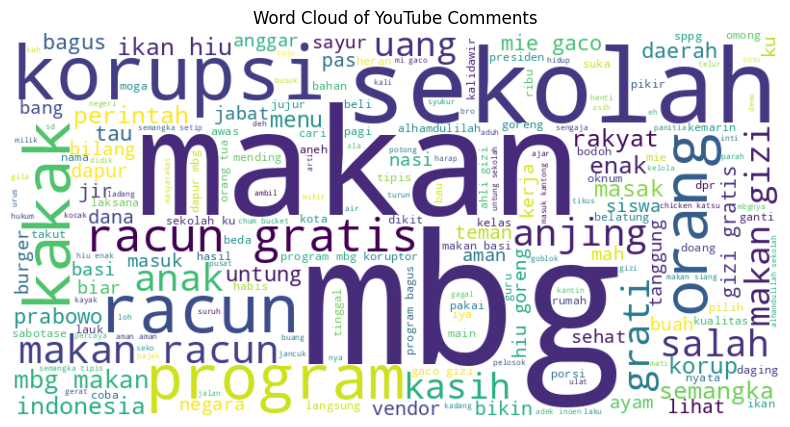

In [29]:
import matplotlib.pyplot as plt

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of YouTube Comments')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `wordcloud` library was confirmed to be already installed in the environment.
*   The cleaned and stemmed text data was successfully combined into a single string.
*   A word cloud was successfully generated and displayed from the combined text data, visualizing the most frequent words.

### Insights or Next Steps

*   Analyze the generated word cloud to identify the most prominent themes and topics in the YouTube comments.
